In [522]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import roc_curve, auc


In [523]:
df = pd.read_csv("C:\\Users\\susha\\OneDrive\\Desktop\\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [524]:
df.shape

(12330, 18)

In [525]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [527]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


C:\Users\susha\AppData\Local\Temp\ipykernel_3724\850946141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Revenue', data=df, palette=['#FF9999', '#66B3FF'])


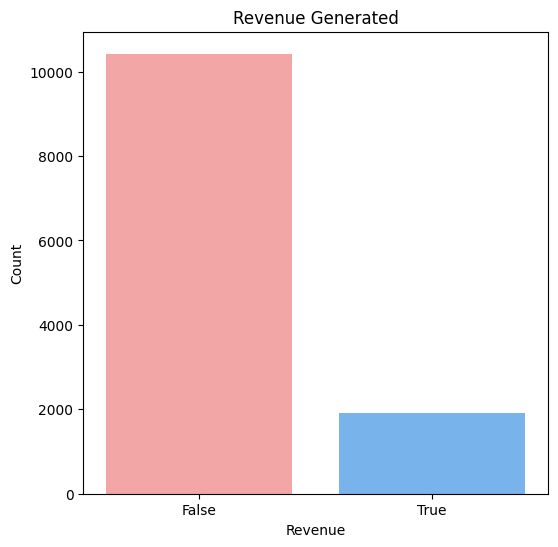

In [528]:
# Create the count plot
ax = sns.countplot(x='Revenue', data=df, palette=['#FF9999', '#66B3FF'])


plt.title('Revenue Generated')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


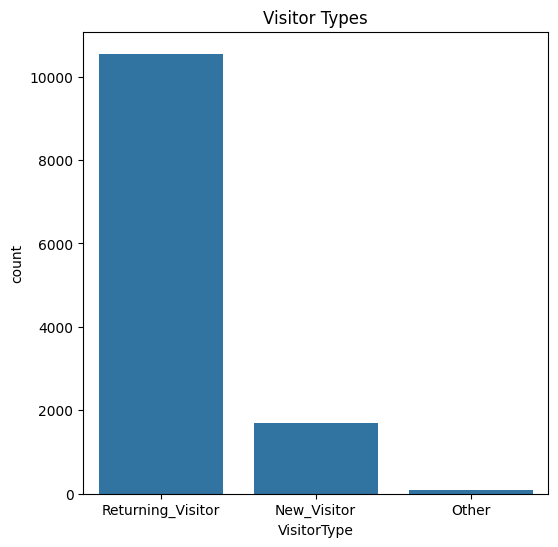

In [529]:
sns.countplot(x='VisitorType', data=df)
plt.title('Visitor Types')
plt.show()


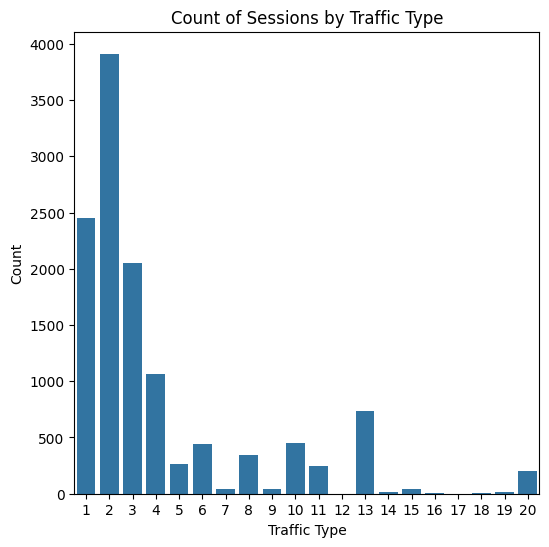

In [530]:


sns.countplot(x='TrafficType', data=df)
plt.title('Count of Sessions by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()

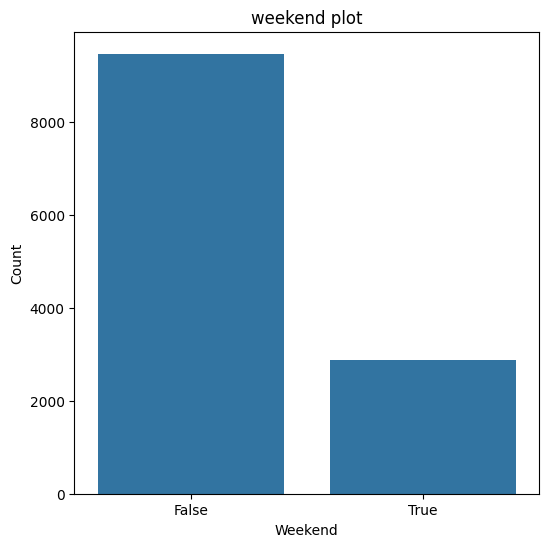

In [531]:


sns.countplot(x='Weekend', data=df)
plt.title('weekend plot')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()

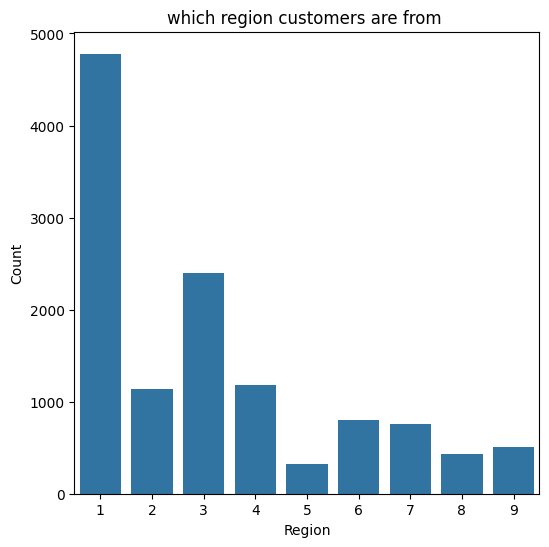

In [532]:

sns.countplot(x='Region', data=df)
plt.title('which region customers are from ')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

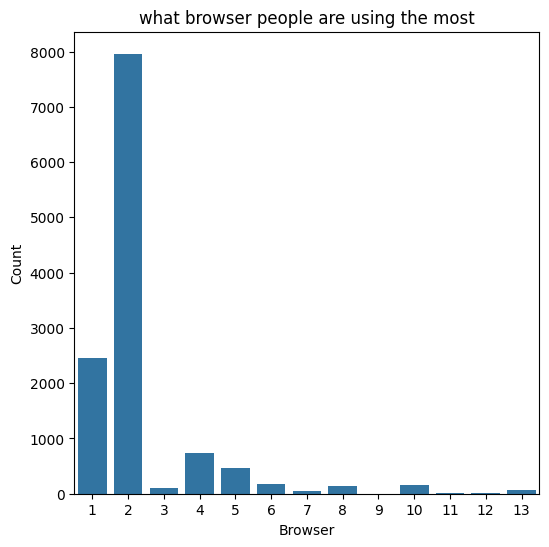

In [533]:

sns.countplot(x='Browser', data=df)
plt.title('what browser people are using the most')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.show()

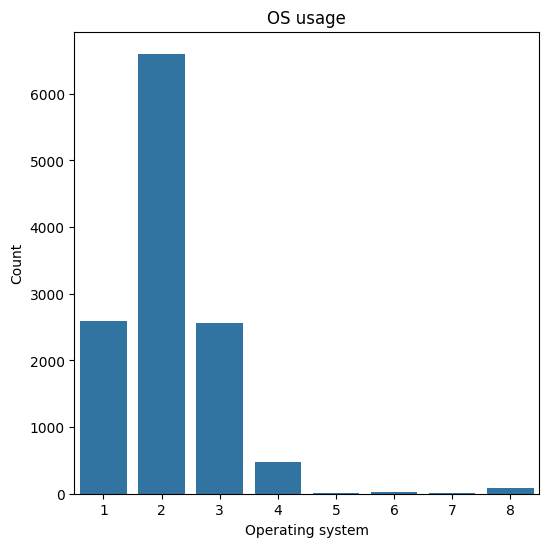

In [534]:


sns.countplot(x='OperatingSystems', data=df)
plt.title('OS usage')
plt.xlabel('Operating system')
plt.ylabel('Count')
plt.show()

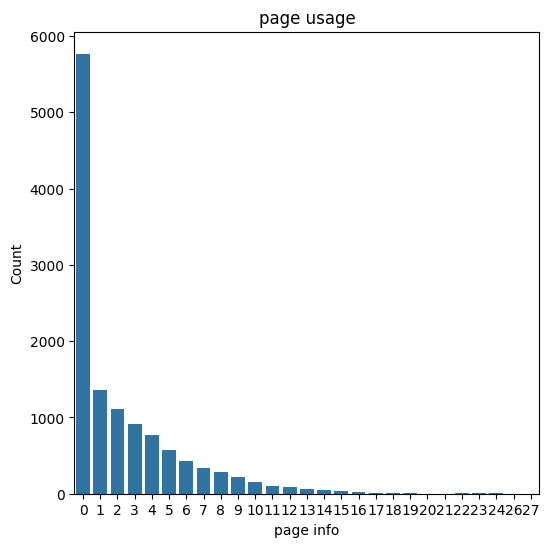

In [535]:


sns.countplot(x='Administrative', data=df)
plt.title('page usage')
plt.xlabel('page info')
plt.ylabel('Count')
plt.show()

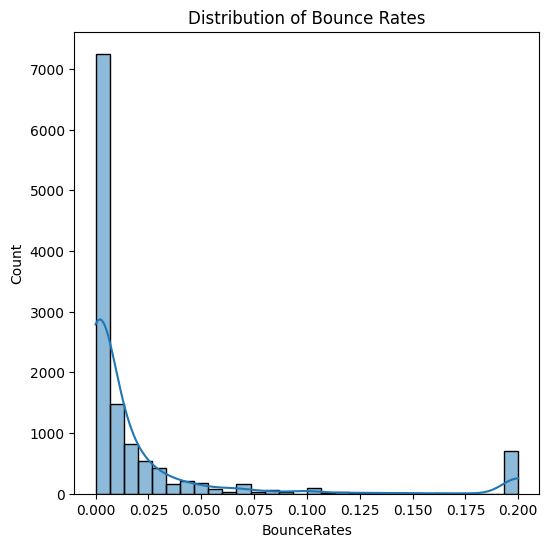

In [536]:
sns.histplot(df['BounceRates'], bins=30, kde=True)
plt.title('Distribution of Bounce Rates')
plt.show()


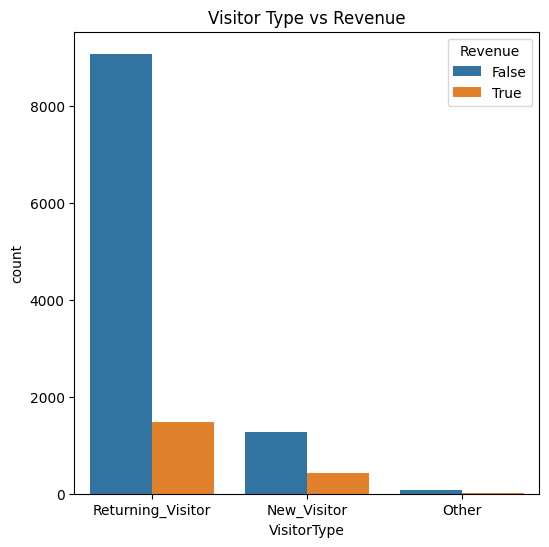

In [537]:
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title('Visitor Type vs Revenue')
plt.show()


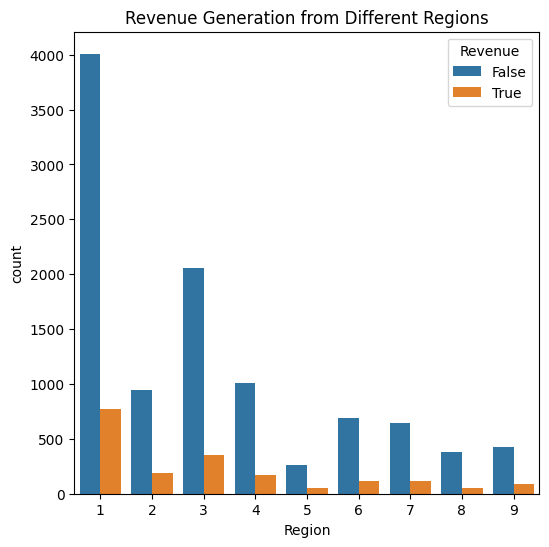

In [538]:
sns.countplot(x='Region', hue='Revenue', data=df)
plt.title('Revenue Generation from Different Regions')
plt.show()


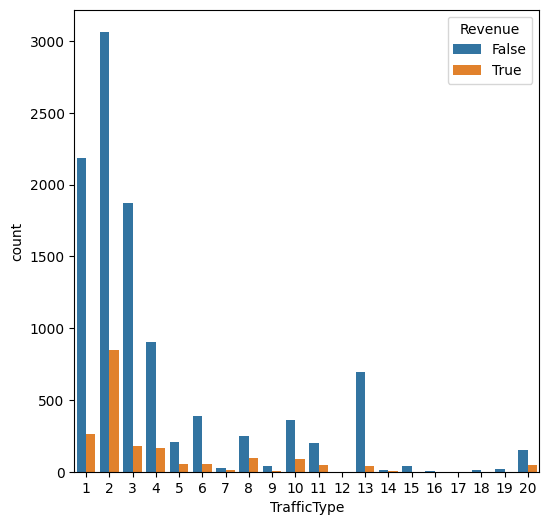

In [539]:
sns.countplot(x='TrafficType', hue='Revenue', data=df)
plt.show()


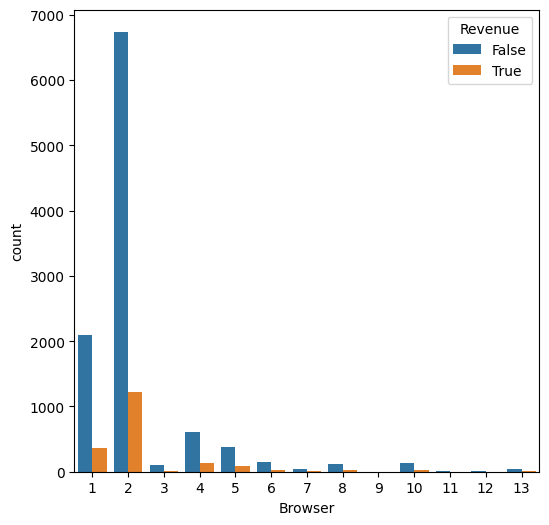

In [540]:
sns.countplot(x='Browser', hue='Revenue', data=df)
plt.show()


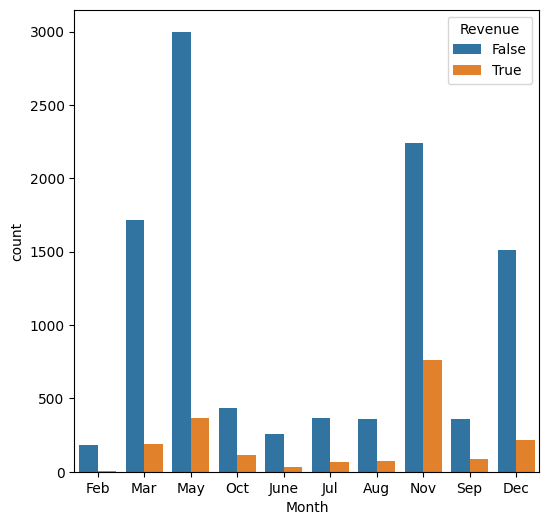

In [541]:
sns.countplot(x='Month', hue='Revenue', data=df)
plt.show()


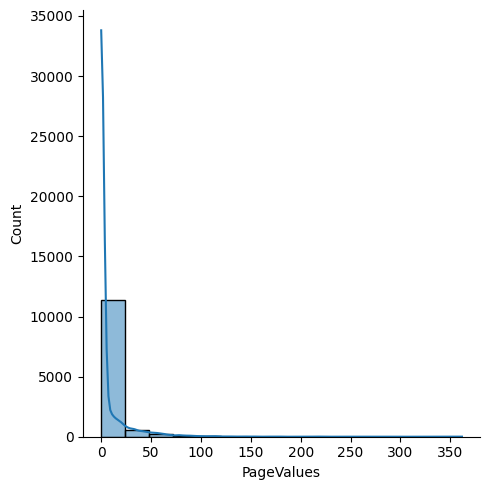

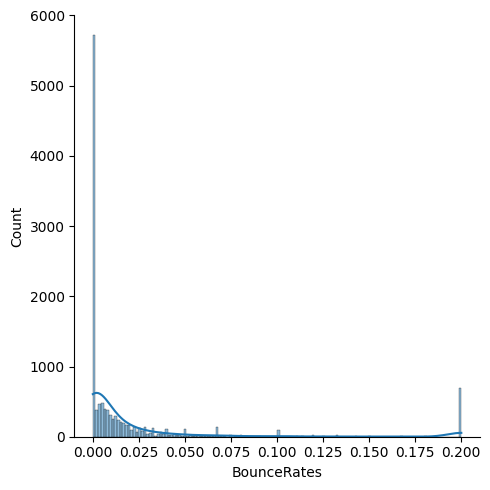

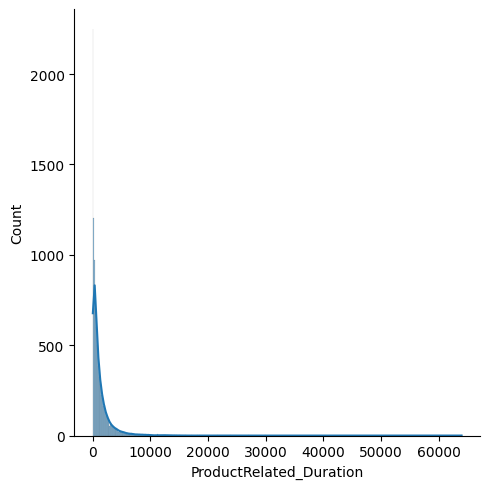

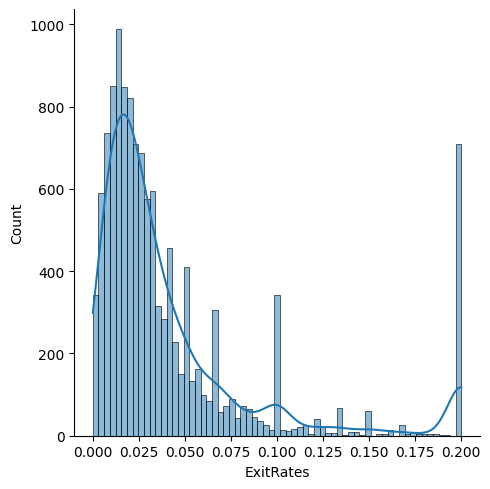

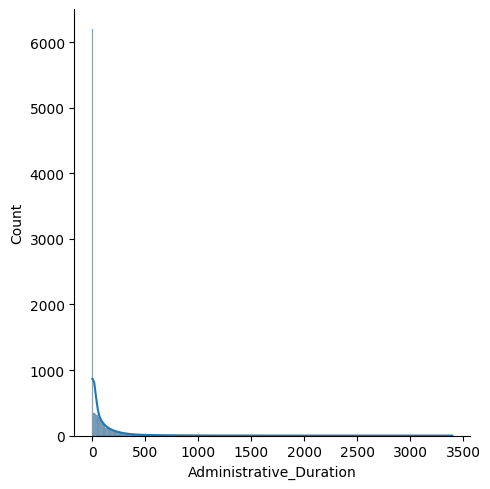

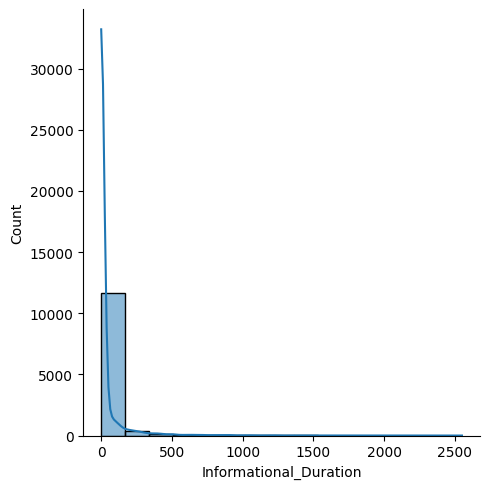

In [542]:
sns.displot(df['PageValues'], kde=True)
plt.show()
sns.displot(df['BounceRates'], kde=True)
plt.show()
sns.displot(df['ProductRelated_Duration'], kde=True)
plt.show()
sns.displot(df['ExitRates'], kde=True)
plt.show()
sns.displot(df['Administrative_Duration'], kde=True)
plt.show()
sns.displot(df['Informational_Duration'], kde=True)
plt.show()


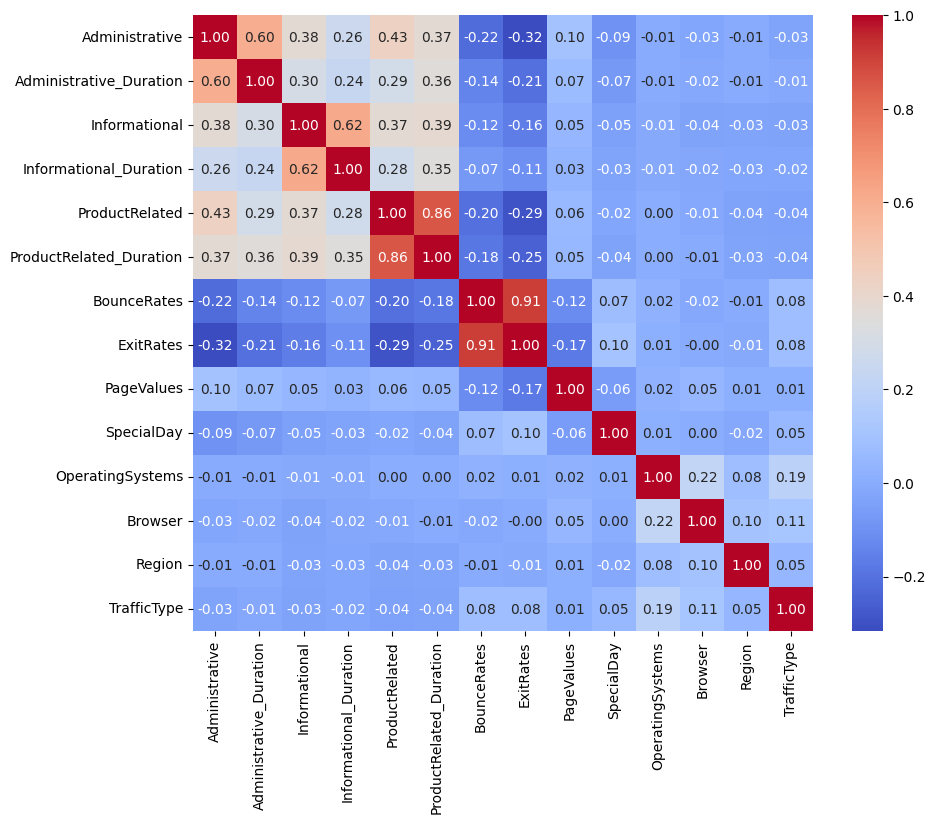

In [543]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [544]:
df = pd.get_dummies(df, columns=['Month', 'VisitorType'])

# Convert boolean columns to integers
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Convert all columns to float
df = df.astype(float)

In [545]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [546]:
def evaluate_model(y_test,y_pred):
    acc= accuracy_score(y_test,y_pred)
    print("test accuracy:",acc)

    cr = classification_report(y_test,y_pred)
    print("classification report : ")
    print(cr)

    cm=confusion_matrix(y_test,y_pred)
    print("confusion matrix :")
    print(cm)
    TP,FN,FP,TN=cm[1][1],cm[1][0],cm[0][1],cm[0][0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR= FP/(FP+TN)
    FNR= FN/(FN+TP)
    print('sensitivity(true positive rate):',TPR)
    print("specificity(true negative rate)",TNR)
    print("false positive rate",FPR)
    print("flase negative rate",FNR)

    print( "confusion matrix:")
    plt.rcParams['figure.figsize']=(6,6)
    sns.heatmap(cm,annot=True)
    return TPR,TNR,FPR,FNR







    

NAIVE BAYES

test accuracy: 0.7901394745377879
classification report : 
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      2594
         1.0       0.40      0.64      0.49       489

    accuracy                           0.79      3083
   macro avg       0.66      0.73      0.68      3083
weighted avg       0.84      0.79      0.81      3083

confusion matrix :
[[2121  473]
 [ 174  315]]
sensitivity(true positive rate): 0.6441717791411042
specificity(true negative rate) 0.8176561295296839
false positive rate 0.1823438704703161
flase negative rate 0.3558282208588957
confusion matrix:


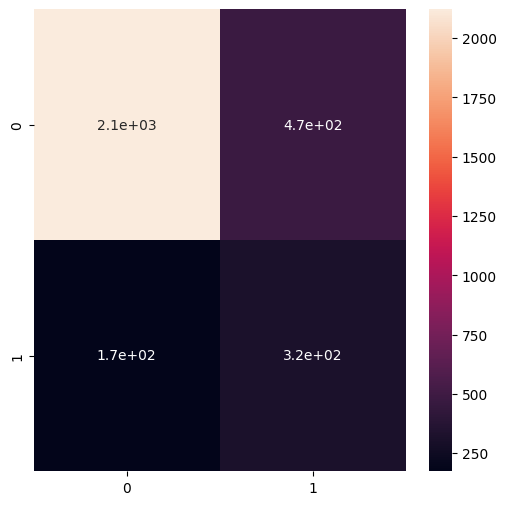

In [547]:

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
model_info = []
model_info.append({'model':model_NB,'label': "naive bayers",'x_test':X_test,'y_test':y_test})
TPR,TNR,FPR,FNR = evaluate_model(y_test,y_pred)
acc_NB= accuracy_score(y_test,y_pred)

LOGISTIC REGRESSION

test accuracy: 0.8738241972105092
classification report : 
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2594
         1.0       0.71      0.35      0.47       489

    accuracy                           0.87      3083
   macro avg       0.80      0.66      0.70      3083
weighted avg       0.86      0.87      0.86      3083

confusion matrix :
[[2523   71]
 [ 318  171]]
sensitivity(true positive rate): 0.3496932515337423
specificity(true negative rate) 0.9726291441788744
false positive rate 0.027370855821125674
flase negative rate 0.6503067484662577
confusion matrix:


c:\Users\susha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


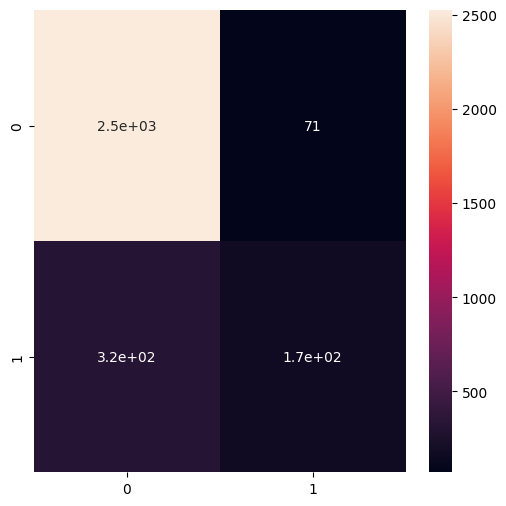

In [548]:

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
model_info.append({'model': model_LR, 'label': 'Logistic Regression', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)
acc_LR= accuracy_score(y_test,y_pred)


DECISION_TREES

test accuracy: 0.8653908530651963
classification report : 
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      2594
         1.0       0.58      0.57      0.57       489

    accuracy                           0.87      3083
   macro avg       0.75      0.74      0.75      3083
weighted avg       0.86      0.87      0.86      3083

confusion matrix :
[[2390  204]
 [ 211  278]]
sensitivity(true positive rate): 0.5685071574642127
specificity(true negative rate) 0.9213569776407093
false positive rate 0.07864302235929067
flase negative rate 0.43149284253578735
confusion matrix:


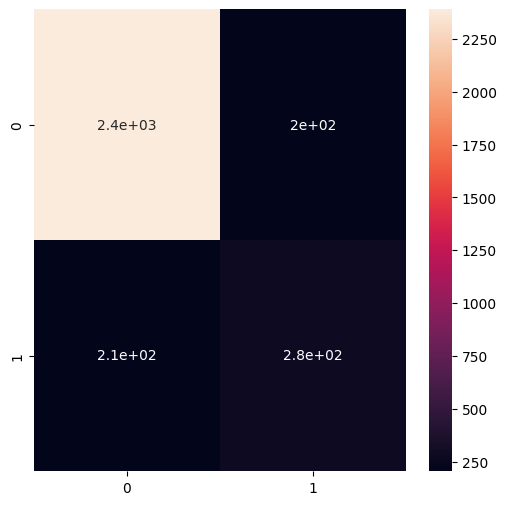

In [549]:


model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
model_info.append({'model': model_DT, 'label': 'Decision Tree', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)
acc_DT= accuracy_score(y_test,y_pred)

Rondom_Forests

test accuracy: 0.8965293545248135
classification report : 
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2594
         1.0       0.73      0.54      0.63       489

    accuracy                           0.90      3083
   macro avg       0.83      0.75      0.78      3083
weighted avg       0.89      0.90      0.89      3083

confusion matrix :
[[2498   96]
 [ 223  266]]
sensitivity(true positive rate): 0.5439672801635992
specificity(true negative rate) 0.9629915188897455
false positive rate 0.03700848111025443
flase negative rate 0.4560327198364008
confusion matrix:


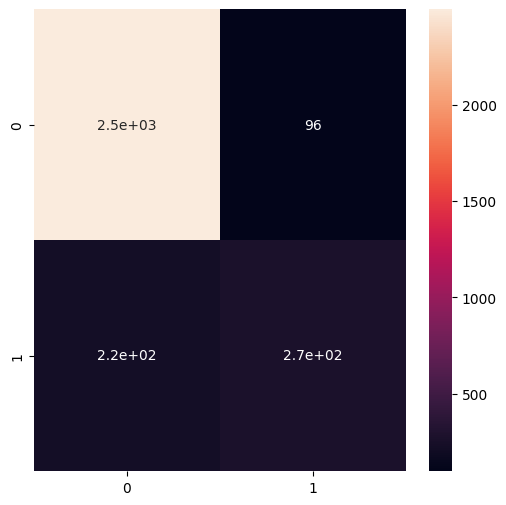

In [550]:

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
model_info.append({'model': model_RF, 'label': 'Random Forest', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)
acc_RF= accuracy_score(y_test,y_pred)

KNN

test accuracy: 0.853065196237431
classification report : 
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      2594
         1.0       0.58      0.26      0.36       489

    accuracy                           0.85      3083
   macro avg       0.73      0.61      0.64      3083
weighted avg       0.83      0.85      0.83      3083

confusion matrix :
[[2501   93]
 [ 360  129]]
sensitivity(true positive rate): 0.26380368098159507
specificity(true negative rate) 0.964148033924441
false positive rate 0.03585196607555898
flase negative rate 0.7361963190184049
confusion matrix:


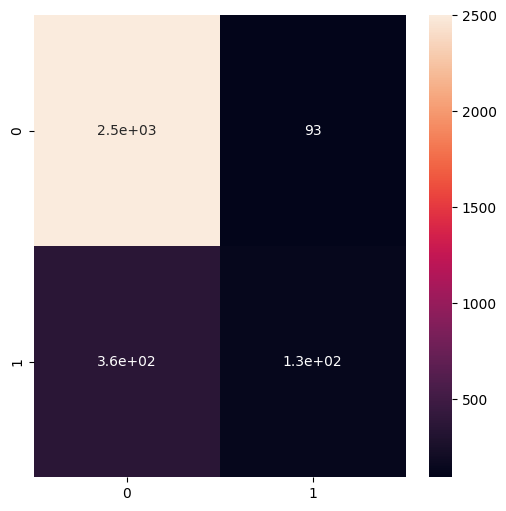

In [551]:

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
model_info.append({'model': model_KNN, 'label': 'KNeighbors', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)
acc_KNN= accuracy_score(y_test,y_pred)

SVM

test accuracy: 0.8430100551410963
classification report : 
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2594
         1.0       1.00      0.01      0.02       489

    accuracy                           0.84      3083
   macro avg       0.92      0.51      0.47      3083
weighted avg       0.87      0.84      0.77      3083

confusion matrix :
[[2594    0]
 [ 484    5]]
sensitivity(true positive rate): 0.010224948875255624
specificity(true negative rate) 1.0
false positive rate 0.0
flase negative rate 0.9897750511247444
confusion matrix:


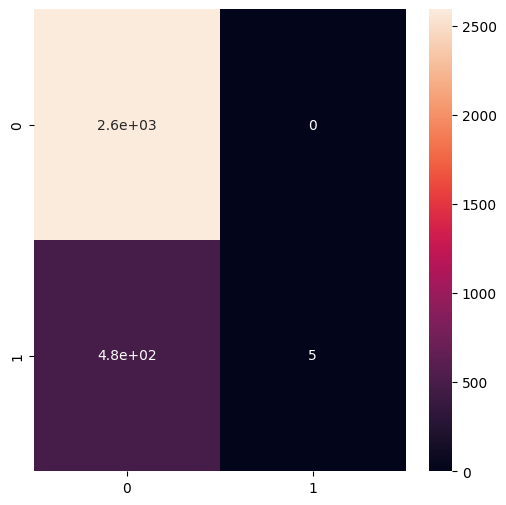

In [552]:

model_SVM = SVC(probability=True)
model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)
model_info.append({'model': model_SVM, 'label': 'SVM', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)
acc_SVM= accuracy_score(y_test,y_pred)

In [553]:
model_normal= model_info

In [554]:
revenue_counts = df['Revenue'].value_counts()
print(revenue_counts)


Revenue
0.0    10422
1.0     1908
Name: count, dtype: int64


In [555]:
X_train.value_counts()
y_train.value_counts()

Revenue
0.0    7828
1.0    1419
Name: count, dtype: int64

c:\Users\susha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


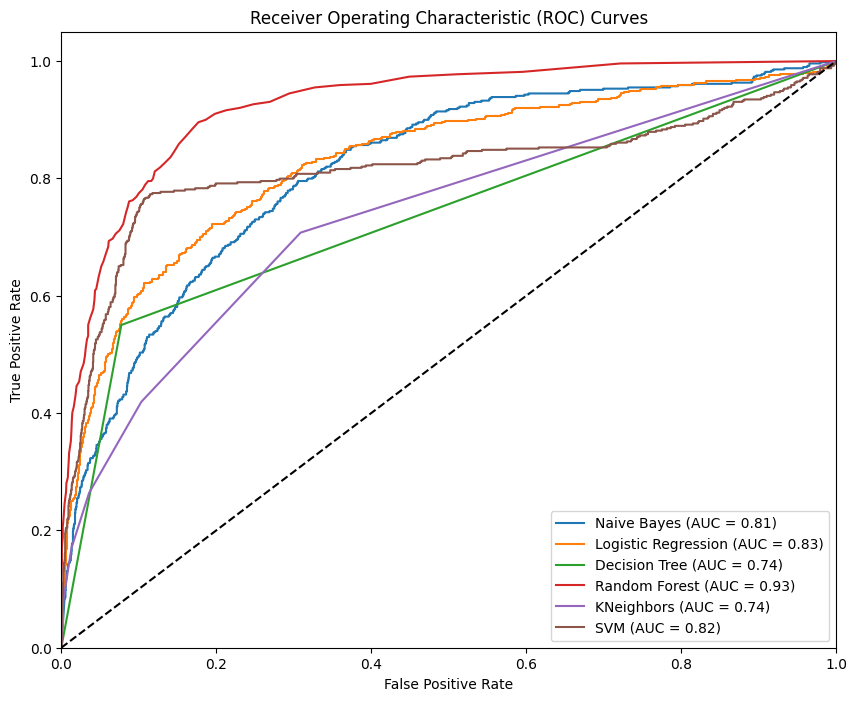

In [556]:
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVM': SVC(probability=True) 
}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [557]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [558]:
X_train_smote.value_counts()
y_train_smote.value_counts()

Revenue
1.0    7828
0.0    7828
Name: count, dtype: int64

test accuracy: 0.6681803438209536
classification report : 
              precision    recall  f1-score   support

         0.0       0.95      0.64      0.77      2594
         1.0       0.30      0.80      0.43       489

    accuracy                           0.67      3083
   macro avg       0.62      0.72      0.60      3083
weighted avg       0.84      0.67      0.71      3083

confusion matrix :
[[1668  926]
 [  97  392]]
sensitivity(true positive rate): 0.8016359918200409
specificity(true negative rate) 0.6430223592906708
false positive rate 0.35697764070932925
flase negative rate 0.1983640081799591
confusion matrix:


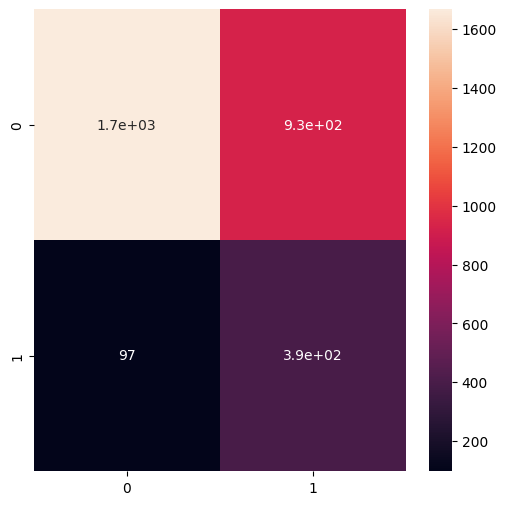

In [559]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)
y_pred = model_NB.predict(X_test)
model_info = []
model_info.append({'model':model_NB,'label': "naive bayers",'x_test':X_test,'y_test':y_test})
TPR,TNR,FPR,FNR = evaluate_model(y_test,y_pred)

test accuracy: 0.8705806033084658
classification report : 
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      2594
         1.0       0.57      0.74      0.64       489

    accuracy                           0.87      3083
   macro avg       0.76      0.82      0.78      3083
weighted avg       0.89      0.87      0.88      3083

confusion matrix :
[[2322  272]
 [ 127  362]]
sensitivity(true positive rate): 0.7402862985685071
specificity(true negative rate) 0.8951426368542791
false positive rate 0.10485736314572089
flase negative rate 0.25971370143149286
confusion matrix:


c:\Users\susha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


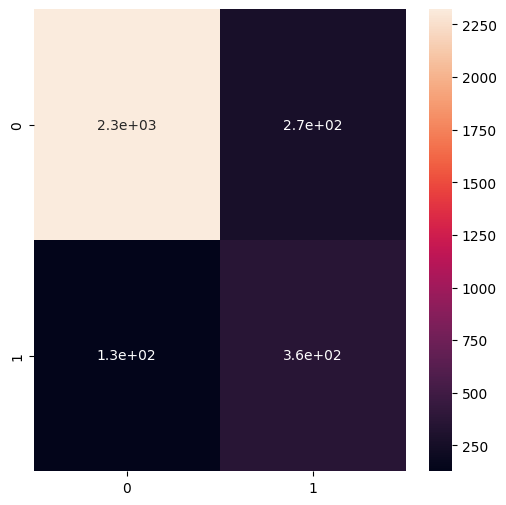

In [560]:
model_LR = LogisticRegression()
model_LR.fit(X_train_smote, y_train_smote)
y_pred = model_LR.predict(X_test)
model_info.append({'model': model_LR, 'label': 'Logistic Regression', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.8634446967239702
classification report : 
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      2594
         1.0       0.57      0.57      0.57       489

    accuracy                           0.86      3083
   macro avg       0.74      0.74      0.74      3083
weighted avg       0.86      0.86      0.86      3083

confusion matrix :
[[2385  209]
 [ 212  277]]
sensitivity(true positive rate): 0.5664621676891616
specificity(true negative rate) 0.9194294525828836
false positive rate 0.08057054741711642
flase negative rate 0.4335378323108384
confusion matrix:


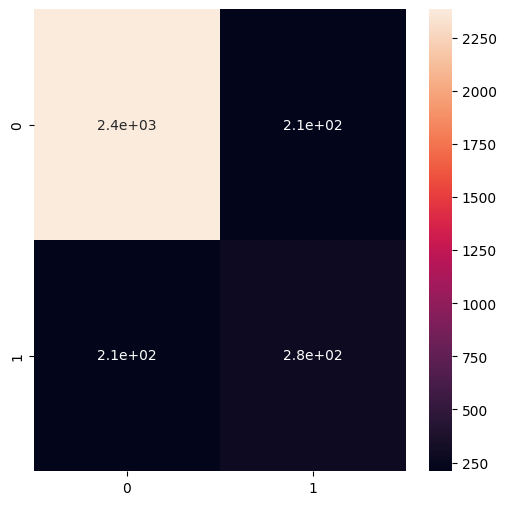

In [561]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)
y_pred = model_DT.predict(X_test)
model_info.append({'model': model_DT, 'label': 'Decision Tree', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.8952319169639961
classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      2594
         1.0       0.68      0.64      0.66       489

    accuracy                           0.90      3083
   macro avg       0.81      0.79      0.80      3083
weighted avg       0.89      0.90      0.89      3083

confusion matrix :
[[2446  148]
 [ 175  314]]
sensitivity(true positive rate): 0.6421267893660532
specificity(true negative rate) 0.9429452582883577
false positive rate 0.05705474171164225
flase negative rate 0.35787321063394684
confusion matrix:


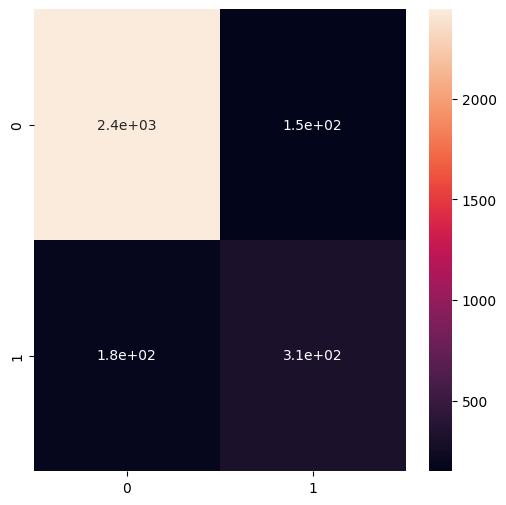

In [562]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_smote, y_train_smote)
y_pred = model_RF.predict(X_test)
model_info.append({'model': model_RF, 'label': 'Random Forest', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.7567304573467402
classification report : 
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      2594
         1.0       0.34      0.59      0.43       489

    accuracy                           0.76      3083
   macro avg       0.63      0.69      0.64      3083
weighted avg       0.82      0.76      0.78      3083

confusion matrix :
[[2046  548]
 [ 202  287]]
sensitivity(true positive rate): 0.5869120654396728
specificity(true negative rate) 0.7887432536622976
false positive rate 0.2112567463377024
flase negative rate 0.4130879345603272
confusion matrix:


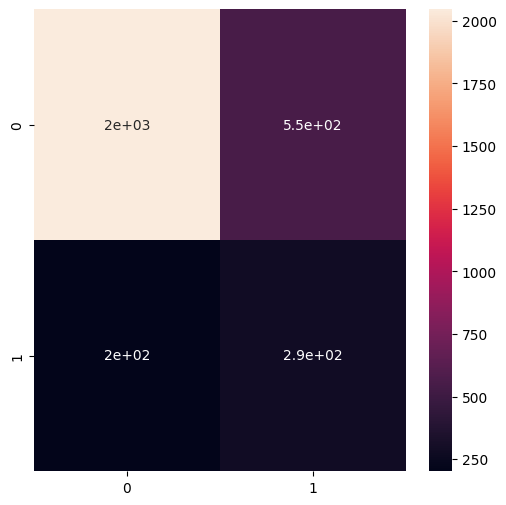

In [563]:

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)
y_pred = model_KNN.predict(X_test)
model_info.append({'model': model_KNN, 'label': 'KNeighbors', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.7229970807654882
classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81      2594
         1.0       0.33      0.74      0.46       489

    accuracy                           0.72      3083
   macro avg       0.64      0.73      0.64      3083
weighted avg       0.84      0.72      0.76      3083

confusion matrix :
[[1865  729]
 [ 125  364]]
sensitivity(true positive rate): 0.7443762781186094
specificity(true negative rate) 0.7189668465690054
false positive rate 0.2810331534309946
flase negative rate 0.2556237218813906
confusion matrix:


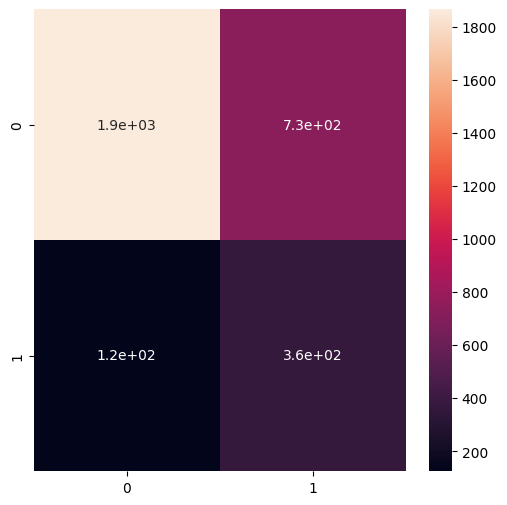

In [564]:

model_SVM = SVC(probability=True)
model_SVM.fit(X_train_smote, y_train_smote)
y_pred = model_SVM.predict(X_test)
model_info.append({'model': model_SVM, 'label': 'SVM', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


c:\Users\susha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


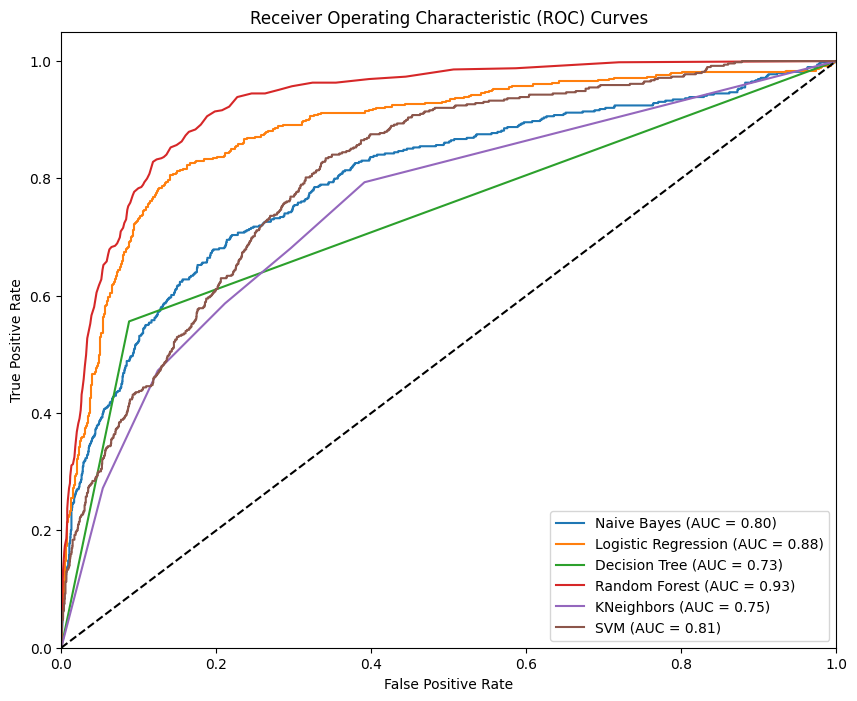

In [565]:
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVM': SVC(probability=True)  
}
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [566]:
def near_miss_data(X_train, y_train):
    nr = NearMiss()
    return nr.fit_resample(X_train, y_train)

X_nr, y_nr = near_miss_data(X_train, y_train)

In [567]:
X_nr.value_counts()
y_nr.value_counts()

Revenue
0.0    1419
1.0    1419
Name: count, dtype: int64

test accuracy: 0.5361660720077847
classification report : 
              precision    recall  f1-score   support

         0.0       0.98      0.46      0.62      2594
         1.0       0.25      0.95      0.39       489

    accuracy                           0.54      3083
   macro avg       0.61      0.71      0.51      3083
weighted avg       0.86      0.54      0.59      3083

confusion matrix :
[[1187 1407]
 [  23  466]]
sensitivity(true positive rate): 0.9529652351738241
specificity(true negative rate) 0.45759444872783345
false positive rate 0.5424055512721665
flase negative rate 0.04703476482617587
confusion matrix:


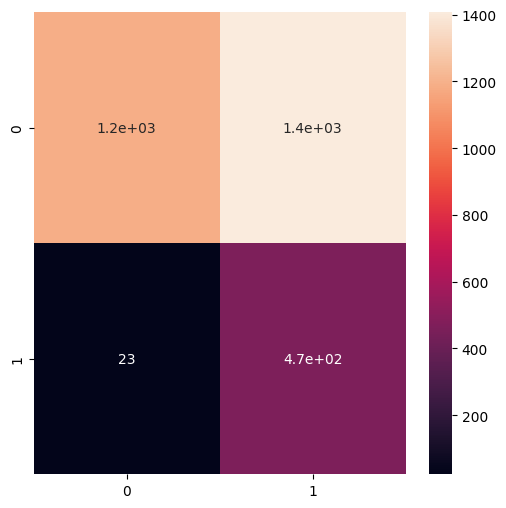

In [568]:
model_NB = GaussianNB()
model_NB.fit(X_nr, y_nr)
y_pred = model_NB.predict(X_test)
model_info = []
model_info.append({'model':model_NB,'label': "naive bayers",'x_test':X_test,'y_test':y_test})
TPR,TNR,FPR,FNR = evaluate_model(y_test,y_pred)

test accuracy: 0.5540058384690236
classification report : 
              precision    recall  f1-score   support

         0.0       0.98      0.48      0.64      2594
         1.0       0.25      0.94      0.40       489

    accuracy                           0.55      3083
   macro avg       0.62      0.71      0.52      3083
weighted avg       0.86      0.55      0.61      3083

confusion matrix :
[[1248 1346]
 [  29  460]]
sensitivity(true positive rate): 0.9406952965235174
specificity(true negative rate) 0.4811102544333076
false positive rate 0.5188897455666923
flase negative rate 0.05930470347648262
confusion matrix:


c:\Users\susha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


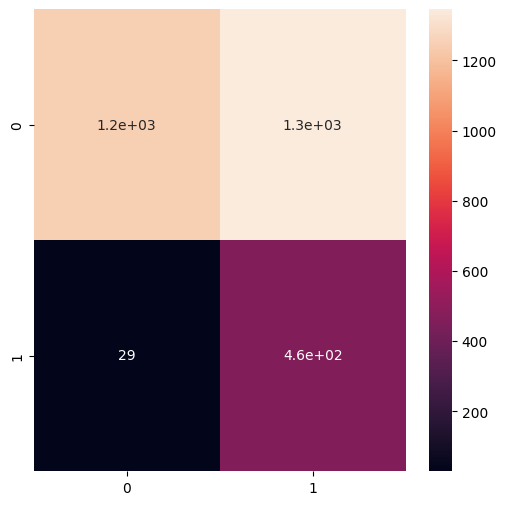

In [569]:
model_LR = LogisticRegression()
model_LR.fit(X_nr, y_nr)
y_pred = model_LR.predict(X_test)
model_info.append({'model': model_LR, 'label': 'Logistic Regression', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.5420045410314629
classification report : 
              precision    recall  f1-score   support

         0.0       0.98      0.46      0.63      2594
         1.0       0.25      0.96      0.40       489

    accuracy                           0.54      3083
   macro avg       0.62      0.71      0.51      3083
weighted avg       0.87      0.54      0.59      3083

confusion matrix :
[[1204 1390]
 [  22  467]]
sensitivity(true positive rate): 0.9550102249488752
specificity(true negative rate) 0.46414803392444104
false positive rate 0.535851966075559
flase negative rate 0.044989775051124746
confusion matrix:


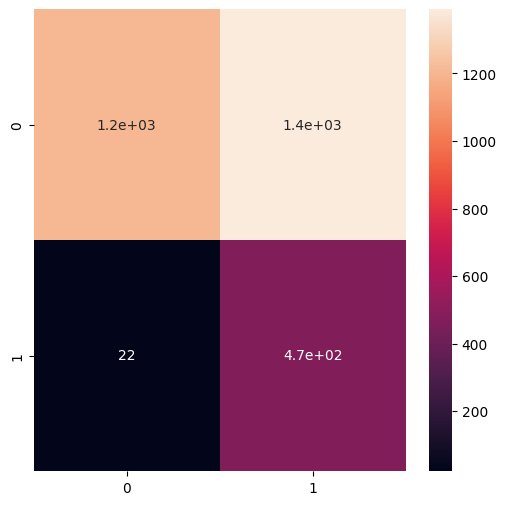

In [570]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_nr, y_nr)
y_pred = model_DT.predict(X_test)
model_info.append({'model': model_DT, 'label': 'Decision Tree', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

test accuracy: 0.5484917288355498
classification report : 
              precision    recall  f1-score   support

         0.0       0.99      0.47      0.64      2594
         1.0       0.26      0.96      0.40       489

    accuracy                           0.55      3083
   macro avg       0.62      0.72      0.52      3083
weighted avg       0.87      0.55      0.60      3083

confusion matrix :
[[1220 1374]
 [  18  471]]
sensitivity(true positive rate): 0.9631901840490797
specificity(true negative rate) 0.47031611410948343
false positive rate 0.5296838858905166
flase negative rate 0.03680981595092025
confusion matrix:


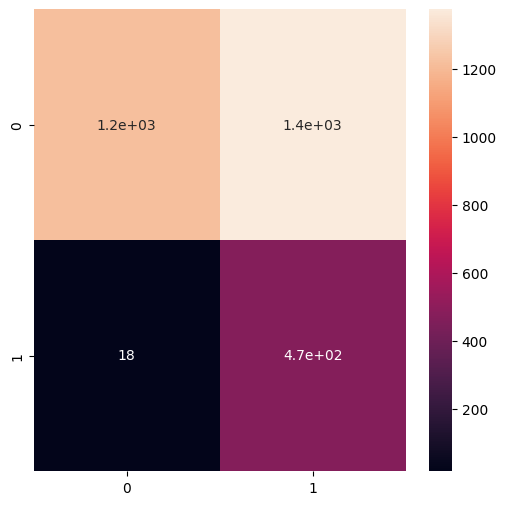

In [571]:
model_RF = RandomForestClassifier()
model_RF.fit(X_nr, y_nr)
y_pred = model_RF.predict(X_test)
model_info.append({'model': model_RF, 'label': 'Random Forest', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.47356470969834574
classification report : 
              precision    recall  f1-score   support

         0.0       0.96      0.39      0.55      2594
         1.0       0.22      0.92      0.36       489

    accuracy                           0.47      3083
   macro avg       0.59      0.66      0.46      3083
weighted avg       0.85      0.47      0.52      3083

confusion matrix :
[[1008 1586]
 [  37  452]]
sensitivity(true positive rate): 0.9243353783231084
specificity(true negative rate) 0.38858905165767155
false positive rate 0.6114109483423285
flase negative rate 0.07566462167689161
confusion matrix:


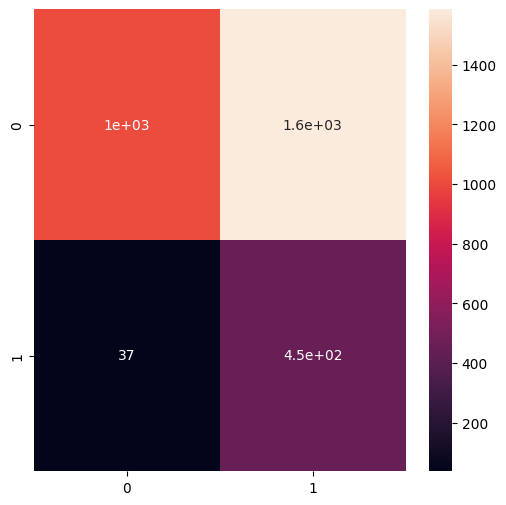

In [572]:

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_nr, y_nr)
y_pred = model_KNN.predict(X_test)
model_info.append({'model': model_KNN, 'label': 'KNeighbors', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


test accuracy: 0.4949724294518326
classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.43      0.59      2594
         1.0       0.22      0.86      0.35       489

    accuracy                           0.49      3083
   macro avg       0.58      0.64      0.47      3083
weighted avg       0.83      0.49      0.55      3083

confusion matrix :
[[1107 1487]
 [  70  419]]
sensitivity(true positive rate): 0.8568507157464212
specificity(true negative rate) 0.42675404780262144
false positive rate 0.5732459521973786
flase negative rate 0.14314928425357873
confusion matrix:


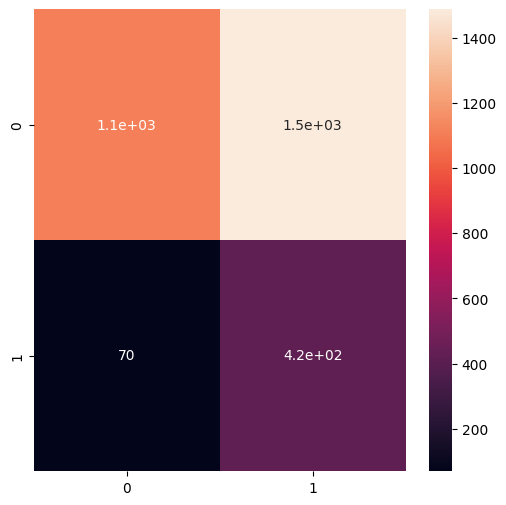

In [573]:

model_SVM = SVC(probability=True)
model_SVM.fit(X_nr, y_nr)
y_pred = model_SVM.predict(X_test)
model_info.append({'model': model_SVM, 'label': 'SVM', 'x_test': X_test, 'y_test': y_test})
TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)


c:\Users\susha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


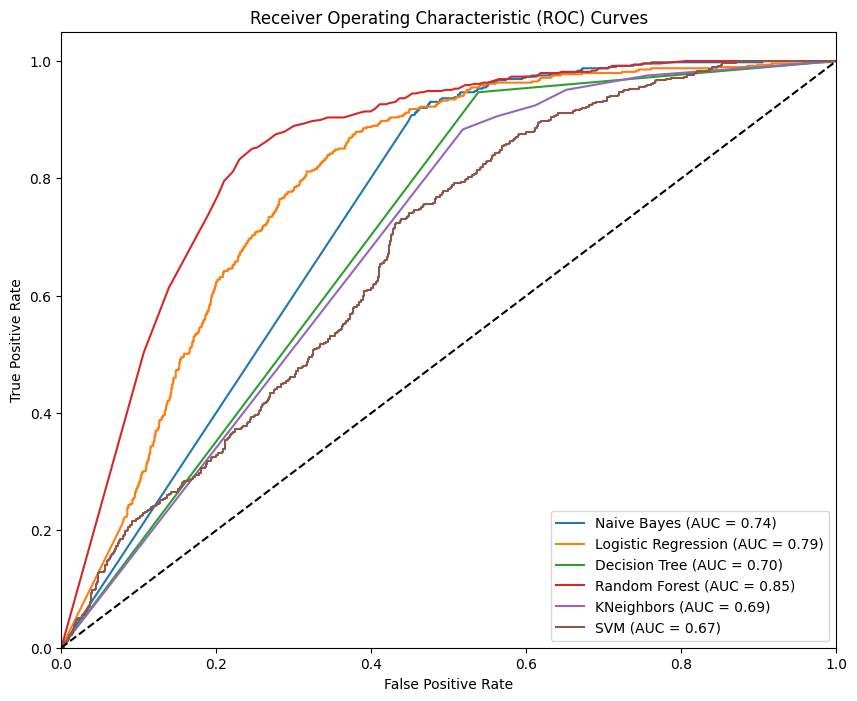

In [574]:
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVM': SVC(probability=True)  
}
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_nr, y_nr)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()